### TERCER MÓDULO - Ficheros

#### DAYANA ROMERO

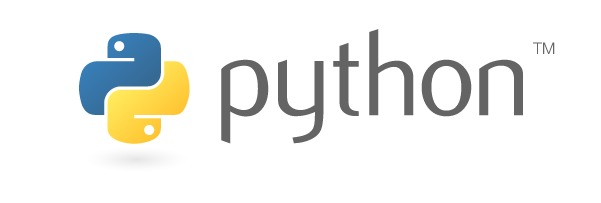!




### Gestión de Ficheros 
El objeto File es un tipo predefinido (built-in) que permite interactuar con archivos externos. Se caracteriza por:

* No ser un número, secuencia ni mapeo.

* Se crea mediante la función open().

* Los datos se manejan siempre como strings (texto).

### 1. Preparación
(Ejecuta esto para crear los archivos de prueba)
Como el material hace referencia a archivos en una carpeta llamada res, ejecuta este bloque primero para que los siguientes ejemplos no den error:

In [8]:
import os

# Crear carpeta y archivos de prueba necesarios
if not os.path.exists('res'):
    os.makedirs('res')

with open('res/multiple_lines.txt', 'w', encoding='utf-8') as f:
    f.write("Este fichero\ncontiene tres\nlineas de texto.")

print("Entorno preparado. Carpeta 'res/' y archivos creados.")

Entorno preparado. Carpeta 'res/' y archivos creados.


In [ ]:
2. Lectura de Ficheros
Existen varias formas de extraer información de un archivo:


Lectura completa (read): Devuelve todo el contenido como una sola cadena.


Lectura línea a línea (for): Ideal para archivos grandes porque no carga todo en memoria a la vez.


Lectura a lista (readlines): Guarda cada línea como un elemento de una lista.

In [10]:
# Ejemplo de lectura completa
mi_fichero = open('res/multiple_lines.txt', 'r')
print(mi_fichero.read())
mi_fichero.close() # Es vital cerrar para liberar recursos [cite: 60]

# Lectura línea a línea (recomendado para eficiencia)
mi_fichero = open('res/multiple_lines.txt', 'r')
for linea in mi_fichero:
    print(f"Línea: {linea.strip()}") 
mi_fichero.close()

Este fichero
contiene tres
lineas de texto.
Línea: Este fichero
Línea: contiene tres
Línea: lineas de texto.


### 3. Rutas y Sentencia with
Para evitar errores entre diferentes sistemas operativos (Windows/Linux), se usa os.path.join. Además, la sentencia with es la forma estándar porque cierra el archivo automáticamente

In [11]:
import os
ruta = os.path.join("res", "multiple_lines.txt")

# Forma habitual de leer ficheros en Python
with open(ruta) as mi_fichero:
    for linea in mi_fichero:
        print(linea, end="")

Este fichero
contiene tres
lineas de texto.

### 4. Modos de Acceso
Al usar open(archivo, modo), puedes definir qué permisos tiene el programa:ModoDescripción rSolo Lectura (por defecto).wSolo Escritura (borra si ya existe).xSolo Escritura (falla si ya existe).aAñadir (si existe, escribe al final).r+Lectura y Escritura.

### 5. Escritura y Buffering
El texto no se escribe en el disco al instante; se queda en un buffer (memoria temporal). Para forzar la escritura se usa close() o el método flush().

In [12]:
import os

def crear_lista(tamanyo):
    return [str(i) + '\n' for i in range(tamanyo)]

ruta = os.path.join("res", "a_dummy.txt")
with open(ruta, 'wt') as fichero:
    fichero.write('Cabecera del ejemplo\n')
    lista = crear_lista(10)
    fichero.writelines(lista)
    print("Archivo 'a_dummy.txt' creado.")

Archivo 'a_dummy.txt' creado.


### 6. Documentación (Docstrings)
Python permite adjuntar documentación a funciones o clases usando triples comillas """ al inicio. Se consultan con help() o accediendo al atributo

In [13]:
def funcion_de_prueba():
    """Esta es la documentación de la función de prueba"""
    pass

print(funcion_de_prueba.__doc__)

Esta es la documentación de la función de prueba


### 7. Ejercicios Resueltos
Basados en las instrucciones del manual:

Escribe una función que reciba una ruta de un fichero de texto y una cadena de caracteres a buscar y determine si la cadena aparece en el fichero.

In [15]:
def buscar_cadena_en_archivo(ruta_fichero, cadena_a_buscar):
    """
    Verifica si una cadena de texto existe dentro de un archivo.
    """
    try:
        with open(ruta_fichero, 'r', encoding='utf-8') as archivo:
            contenido = archivo.read()
            if cadena_a_buscar in contenido:
                return True
            else:
                return False
    except FileNotFoundError:
        return "Error: El archivo no fue encontrado."

# Ejemplo de uso:
print(buscar_cadena_en_archivo('res/multiple_lines.txt', 'fichero'))

True


Escribe una función que reciba una lista, una ruta destino y un número n. La función debe crear un fichero en la ruta especificada. El contenido del fichero serán los primeros n elementos de la lista. La función debe controlar de manera apropiada los posibles valores de n que estén fuera de rango.

In [25]:
def crear_fichero_segmentado(lista, ruta_destino, n):
    if n < 0:
        n = 0
    elif n > len(lista):
        n = len(lista)
    
    elementos_a_guardar = lista[:n]
    
    try:
        with open(ruta_destino, 'w', encoding='utf-8') as archivo:
            for item in elementos_a_guardar:
                archivo.write(str(item) + '\n')
        print(f"Fichero creado exitosamente con {n} elementos.")
    except Exception as e:
        print(f"Ocurrió un error: {e}")

# --- ESTO DEBE IR PEGADO AL BORDE IZQUIERDO ---
mi_lista = ['Manzana', 'Pera', 'Uva', 'Sandía']
crear_fichero_segmentado(mi_lista, 'res/frutas.txt', 2)

Fichero creado exitosamente con 2 elementos.


Escribe una función que reciba una ruta de un fichero de texto y devuelva un diccionario con la frecuencia de aparición de cada palabra. Ejemplo: un fichero que contenga la frase 'es mejor que venga que que no venga' devolverá el siguiente diccionario: {'es' : 1, 'mejor' : 1, 'que' : 3, 'venga' : 2, 'no' : 1}. Para dividir un string en palabras puedes hacer uso del método split.

In [20]:
def frecuencia_palabras(ruta):
    """
    Devuelve un diccionario con la frecuencia de cada palabra en el fichero.
    """
    try:
        with open(ruta, 'r', encoding='utf-8') as f:
            # El método split() divide el texto por espacios y saltos de línea
            palabras = f.read().split()
            
            frecuencias = {}
            for palabra in palabras:
                # Opcional: convertir a minúsculas para contar sin distinguir caja
                palabra = palabra.lower()
                frecuencias[palabra] = frecuencias.get(palabra, 0) + 1
            return frecuencias
    except FileNotFoundError:
        return "Error: No se encontró el archivo."

# Ejemplo de ejecución:
print(frecuencia_palabras('res/frase_prueba.txt'))

Error: No se encontró el archivo.


https://github.com/dayanaromero937-ship-it/practicasintroduccionapython/blob/main/Ficheros.ipynb